# Funciones. Conceptos avanzados.
**Autores**: Rogelio Mazaeda, Félix Miguel Trespaderne.   

## Contenidos
[Funciones puras e impuras](#Funciones_puras_e_impuras)<br>
[El mecanismo de las llamadas a funciones](#El_mecanismo_de_las_llamadas_a_funciones)<br>
[Alcance de las variables: variables locales y globales](#Alcance_de_las_variables:_variables_locales_y_globales)<br>
[Recursividad](#Recursividad)<br>
[Las funciones como objetos](#Las_funciones_como_objetos)<br>
[Funciones con un número indeterminado de argumentos](#Funciones_con_un_número_indeterminado_de_argumentos)<br>
[Polimorfismo con funciones](#Polimorfismo_con_funciones)<br>
[Resumen de buenas prácticas](#Buenas_prácticas)<br>
[Temas avanzados y bibliografía específica](#Temas_avanzados)

<a id='Funciones_puras_e_impuras'></a>

## Funciones puras e impuras

Las **funciones** de Python que tienen un comportamiento **similar a las funciones matemáticas**, esto es, constituyen una relación unívoca entre el dominio de los valores de entrada y el valor de la salida, se denominan **funciones puras**.

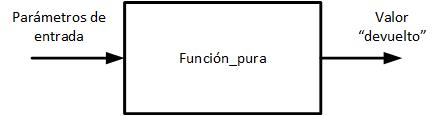

Se puede decir de las **funciones puras** que:

- Devuelven el **mismo resultado** al ser _llamadas_ con los **mismos valores de entrada**.
- El resultado sólo depende de la entrada: no tienen **memoria**, no conservan un **estado** que les permita _recordar_ que la misma ha sido _invocada_ antes, para entonces devolver un valor distinto en llamadas sucesivas.
- No tiene **efectos secundarios** (**side effects**). La única forma de interacción con el resto de programa, o el contexto en que éste se desarrolla, es a través de la sentencia `return`. En especial:
    - No modifican **variables globales** (se discute más adelante).
    - No imprime nada por pantalla, ni interaccionan de ninguna otra manera con el _mundo exterior_. 
    
Las **funciones impuras** son el resto de las funciones. Por ejemplo:
- Funciones sin parámetros de entrada y/o sin valores devueltos mediante `return`.
- Funciones que devuelven valores diferentes cada vez.
- Funciones que modifican las variables globales o aquellos parámetros que sean **mutables**.

### Ventajas de las funciones puras

El trabajar preferentemente con **funciones puras** está en la base del **paradigma funcional** de programación, que en los últimos años está recobrando un nuevo auge. 

El uso de **funciones puras** permite utilizar en programación las herramientas de análisis en las matemáticas y _demostrar_, en el sentido matemático del término, la _corrección_ de un programa de ordenador. En cualquier caso, una descripción de los principios y prácticas de la **programación funcional** está fuera de los marcos de este curso introductorio.

Eso no impide que recomendemos, siempre que sea razonable, el uso **funciones puras**:
- Al _prohibir_ los *efectos colaterales*, hace que los programas sean más fácilmente depurables. 
- Permite además la **composición** de funciones: el pasar como argumentos de funciones, directamente el valor devuelto por otra función (con cualquier grado de anidamiento). Ejemplo: `cos(log(x))`.

### Las funciones impuras son inevitables

El objetivo de la programación es **aceptar datos** del *mundo exterior*, **procesarlos** de alguna forma y **devolverlos** al usuario. O sea, la utilidad global de los programas está precisamente en lograr determinados **efectos colaterales**.

En todo caso, resulta útil, confinar estás interacciones con el **mundo exterior** a determinadas funciones bien _localizadas_.

Ejemplos de funciones impuras imprescindibles o útiles:
- Las funciones de entrada y salida, utilizando la consola, ficheros o redes informáticas, entre otras:
> Por ejemplo, la función `input()`: aunque sea llamada con el mismo parámetro de entrada, puede devolver cada vez valores diferentes: el usuario humano tiene un **estado** o **memoria**.
- Función que devuelve un número aleatorio: resulta útil porque precisamente tiene **memoria**: devuelve un valor diferente cada vez.

***
<a id='El_mecanismo_de_las_llamadas_a_funciones'></a>

## El mecanismo de las llamadas a funciones

Como ya se ha dicho, las funciones permiten dar una estructura lógica a un programa al dividirlo en varios subprogramas, cada uno ocupándose de una tarea bien definida. 

Este proceso de división del programa tiene un carácter jerárquico: el programa principal, en la parte más alta de la jerarquía, describe la solución desde el punto de vista más general, haciendo uso de las diferentes funciones para resolver las subtareas. Cada función, a su vez, puede ser dividida en otros tantos subproblemas, y así sucesivamente utilizando tantos niveles jerárquicos como se considere necesario.

Durante la ejecución del programa, el proceso de llamadas a funciones y el retorno desde estas, puede ser conceptualmente interpretado como recursos del lenguaje que modifican el flujo normal (secuencial) del programa.

#### Ejemplo
Se sabe de las matemáticas combinatorias que el número de posibilidades de escoger $k$ elementos en una población de $n$, las **combinaciones**, viene dado por la expresión:

\begin{align}
\\C_{n,k} = {n \choose k} = \frac {n!}{k!(n-k)!} \\
\end{align}


Supongamos que se decide calcular las combinaciones mediante una función de Python, utilizando a su vez otra función que determina el factorial de un número entero.

In [1]:
# calcula factorial de argumento n
def factorial(n):
    fact = 1
    if n > 1:
        for i in range(2, n+1):
            fact *= i
    return fact


# calcula combinaciones de n tomadas k a la vez
def combinaciones(n, k):
    comb = -1
    if n >= k:
        comb = factorial(n)/(factorial(k)*factorial(n-k))
    return comb


# Programa principal

elementos = 5
muestras = 3
print(combinaciones(elementos, muestras))

10.0


La estructura del programa anterior se podría visualizar gráficamente como se muestra. Se divide en el programa principal y dos funciones, ```combinaciones()``` y ```factorial()```. Además se utiliza la función ```print()```, que es una función nativa.

![combinaciones.jpg](img/combinaciones.jpg)

La información brindada por el esquema se limita básicamente a la estructura estática del programa, aunque con las flechas se muestra desde dónde se realizan las llamadas a las diferentes funciones, lo que indica una especie de jerarquía entre ellas para este ejemplo concreto: 

1. El programa principal utiliza la función `print()`.

2. A su vez `print()` *obtiene* los valores a imprimir, a partir de utilizar la función `combinaciones()`. 

3. Finalmente, `combinaciones()` se sirve de la función `factorial()`.

El programa principal utiliza la función ```combinaciones()```; por tanto, la definición de esta última debe preceder en el texto del programa al primero. Por la misma razón, la función `factorial()` debe aparecer antes que `combinaciones()`.

### Traza de un programa
La ejecución de un programa en Python comienza en la primera línea del programa principal. A partir de ese punto se van ejecutando las sentencias siguiendo el orden secuencial por defecto, que puede ser alterado por las sentencias de control de flujo ya conocidas.

La presencia de las llamadas a función implica la modificación de ese orden por defecto. 

Durante la ejecución de un programa, se van modificando los diferentes valores involucrados en la medida en que se van ejecutando las diferentes sentencias. Se puede hablar del **hilo de ejecución** a esta evolución de una sentencia a otra y los efectos producidos. Una forma de hacer evidente esta evolución es realizando la **traza del programa**.

La traza se puede ejecutar con lápiz y papel. Las herramientas de desarrollo, como **Spyder**, suelen tener incorporados **depuradores** del código (**debuggers**), que permiten también construir la traza. Existen también otras aplicaciones disponibles, como [pythontutor](http://www.pythontutor.com/visualize.html#mode=edit), que ayudan en este propósito.

En lo que sigue se muestran algunos momentos de la traza del ejemplo previo.

![Traza.jpg](img/traza.jpg)

[Traza Ejemplo Combinaciones](doc/traza_combinaciones.pptx)

A partir del análisis de la traza del programa se puede entender el mecanismo de las llamadas a función:

* Cuando durante la evaluación de una sentencia aparece la **invocación** de una o varias funciones, la ejecución de la sentencia actual debe interrumpirse para ejecutar la(s) llamada(s) a la(s) función(es) involucrada(s). Si existen varias llamadas a la hora de evaluar una expresión, las llamadas se realizarán secuencialmente en el orden en que sea necesario y que se deriva del orden de evaluación de la expresión en que aparecen.
* El proceso de llamada a la función consiste en los siguientes pasos:
    1. Interrumpir la evaluación de la sentencia que provoca la llamada.
    2. A continuación, y con vistas a que el **hilo de ejecución** del programa continúe en la primera sentencia de la función invocada, los parámetros reales (si existieran) son determinados y resultan copiados en los parámetros formales. Como se ha visto, la relación entre parámetros reales y argumentos formales se puede realizar por posición, pero también utilizando el concepto de argumento con nombre, o una combinación de ambos.
    3. Se ejecuta la función desde su primera sentencia. Dentro de la función, se pueden utilizar los **identificadores** de los parámetros formales, para acceder a los valores que han sido *pasados* desde el código que ha llamado a la función. También se pueden crear nuevos valores (**variables locales**) en la medida en que se requiera.
    4. Cuando el **hilo de ejecución** llegue a una sentencia `return` o simplemente a la última sentencia ejecutable, la siguiente sentencia a ejecutar sería aquella que resultó *interrumpida* cuando se llamó a la función.
    5. Si la función devuelve valores mediante la sentencia `return`, el valor *devuelto* participará en la expresión cuya evaluación fue interrumpida.

En el ejemplo:

- Durante la evaluación de los argumentos de la función nativa `print()`, se necesita llamar a la función `combinaciones()`, pasando como parámetros reales los valores `elementos` y `muestras`, que en este ejemplo identifican a los enteros `5` y `3` respectivamente. Los parámetros reales se asocian a los argumentos formales por posición: `5` $\Rightarrow$ `n` y `3` $\Rightarrow$ `k`.

- Durante la evaluación de `combinaciones()` se llama a la función `factorial()`. Las llamadas se llevan a cabo en el orden en que evalúa la expresión en que aparecen: 
    - la primera vez con el parámetro formal dado por el contenido de la variable ```n``` de ```combinaciones()``` que se asocia por posición al argumento real ```n``` de ```factorial()```.
    - la segunda vez con el parámetro real ```k``` que se asocia al parámetro formal ```n``` de ```factorial()```.
    - la tercera vez con el parámetro real que es el resultado de la expresión ```n-k``` y que de nuevo se asocia al parámetro ```n```.

### La pila de llamadas 

¿Cuál es el mecanismo que soporta el funcionamiento correcto de las llamadas a funciones? ¿Cómo el intérprete de Python *conoce* el punto exacto al que se debe retornar cuando cada una de las llamadas a función termina retornando valores?

Como se refleja en la figura anterior, al inicio de cada llamada se crea un **marco de memoria** local de valores que contienen:
* los valores de entrada de los argumentos de la función
* todas aquellas variables que la función declare localmente. 

El **marco de memoria** de la función estará vigente mientras el **hilo de ejecución** de la función se *encuentre* dentro de la mismas, es decir, mientras la función no haya finalizado.

Si la función llama a su vez a otra función (ej: cuando ```combinaciones()``` llama a ```factorial()```) el **marco** asociado a la función que llama no desaparece, sino que se crea un nuevo **marco** asociado a la función llamada.

El mecanismo de creación de estos **marcos** en la memoria del ordenador sigue el esquema asociado a una estructura de datos muy conocida en programación que es la llamada **pila** (**stack**).

![Pila.jpg](img/pila.jpg)

La pila almacena información, pero lo hace **restringiendo** la forma en que esta información puede ser añadida o eliminada.
Así, la pila tiene sólo dos operaciones básicas:
- **PUSH(dato)**: Es la forma de introducir un nuevo dato en la pila y sólo puede hacerse por la parte _superior_ de la misma, utilizando para ello el **puntero de la pila** (**SP**: **stack pointer**). El **SP** contiene la _dirección_ en memoria del dato actualmente en la parte superior. Para introducir un nuevo dato, el **SP** debe ser incrementado (si es que hay memoria suficiente para hacerlo) para introducir el dato en la nueva localización de memoria, actualizando el valor **SP** que ahora **apuntará** al nuevo dato.
> El método `append(dato)` de las listas es un ejemplo de la operación tipo **PUSH(dato)**.
- **POP()**: Para poder realizar esta operación, la **pila** no puede estar vacía: o sea, el **SP** no puede ser igual a la **base de la pila** (**SB**: **stack bottom**). Si no está vacía la pila, la operación **POP** simplemente consiste en *decrementar* el **SP**. El elemento que antes estaba en el *tope* ahora resulta inaccesible, con lo que a todos los efectos es como si ha resultado **eliminado**. Si acto seguido se vuelve a apilar, el nuevo dato se **sobrescribirá** sobre el anterior.
> El método `pop()` de las listas, sin argumentos, es un ejemplo de la operación tipo **POP()**. Nótese que las listas no son una estructura de datos tipo pila, porque están permitidas operaciones como `remove()` o `insert()` que están prohibidas en una pila.

Los **marcos de variables** que se crean para albergar las variables de cada función se implementan precisamente en una estructura de datos, la **pila del sistema** o **pila de llamadas**, que es independiente para cada **hilo de ejecución** que se encuentre en el ordenador. Esto es implementado conjuntamente por el *hardware* del computador, el Sistema Operativo y el **motor en tiempo de ejecución** (**runtime engine**) de Python.

El funcionamiento básico de las llamadas a funciones y de los **marcos** desde el punto de vista de la **pila del sistema** es el siguiente:
- Cuando se produce la llamada a la función, se realiza una operación **PUSH** introduciendo en la **pila** el nuevo **marco** necesario. Además de los parámetros de la función y las variables locales, también se introduce otro tipo de información no mostrada en los diagramas de trazas previos. La más importante es la *dirección* en memoria que marca el punto exacto donde se encuentra alojada la instrucción cuya evaluación ha sido interrumpida para llamar a la función y al que hay que regresar cuando la misma termine.
- Cuando una función termina su ejecución, se realiza una operación **POP** de forma que los valores almacenados  quedan efectivamente _eliminados_ de la memoria por inaccesibles. Antes de hacer la operación **POP**, se obtiene de la **pila** la dirección de retorno y valor que se va a devolver.
- Observe que, durante las llamadas anidadas a distintas funciones, el especial funcionamiento de la **pila** permite adquirir y liberar la memoria de los **marcos** de la forma adecuada.

***
<a id='Alcance_de_las_variables:_variables_locales_y_globales'></a>

## Alcance de las variables: variables locales y globales

El **alcance** de una variable da cuenta de las reglas que especifican _desde_ qué sentencias del código Python son _accesibles_ cada una de las variables, teniendo en cuenta el _lugar_ dentro del código en el que han sido especificadas.

Como se ha visto, los parámetros formales en la definición de una función y las variables creadas en el cuerpo de la misma, son **variables locales** a dicha función y sólo pueden ser accedidas desde código definido en el cuerpo de la misma en sentencias posteriores a su creación.

La esencia de una **buena programación** procedural y modular, y de ello la gran ventaja del uso de las funciones, reside precisamente en el uso preferente de **variables locales**, puesto que este es el mecanismo del lenguaje que brinda el grado apropiado de _desacople_ necesario entre el código que _usa_ una función y su implementación interna. Esto es, garantiza la muy necesaria _abstracción_ que hace que podamos utilizar las funciones sin preocuparnos de los _detalles_ internos.

Obsérvese que esta independencia quedaría destruida si las variables internas, que se crean en el **marco** de la función, pudieran ser modificadas o accedidas externamente. De nuevo hay que recalcar que la interacción legítima con las funciones debe ser a partir de su interfaz pública: los argumentos formales y los valores de retorno.

In [2]:
# Multiplica n * 10
def mult_10(n):
    a = 10*n
    print('a en mult_10: ', a, 'n en mult_10: ', n)
    return a


# Programa principal
a = 5
n = mult_10(3*a)
print('a en prog. principal: ', a, 'n en prog. principal: ', n)

a en mult_10:  150 n en mult_10:  15
a en prog. principal:  5 n en prog. principal:  150


En el código previo, las variables ```a``` y ```n``` creadas en el programa principal, no son las mismas que las variables con idéntico nombre en la función ```mult_10()```. Estas últimas están definidas en el **marco** local de la función: la primera ```n``` es el nombre del argumento formal de la función y la segunda es creada cuando se realiza la asignación (```a = 10*n```). De hecho, debe notarse que al llamar a la función, lo que se pasa como parámetro real a la misma, es el resultado de multiplicar ```3*a```. Finalmente, cuando la función retorna, es el valor de la variable local ```a``` el que resulta asignado a la variable ```n```.

Este grado de desconexión entre las variables locales de la diferentes funciones y las del programa principal es precisamente lo que se busca.

De todas formas, en Python se considera que las funciones están definidas **dentro** del programa principal. Siendo este el caso, es cierto que desde la función se puede **acceder** a variables definidas en el programa principal, siempre que no haya ningún parámetro o variable local del mismo nombre.

In [3]:
def func(b):
    c = 30
    print('func a = ', a, 'b = ', b, 'c = ', c)

    
# Programa principal
a = 5
b = 10
c = 20
func(1)
print('Prog. principal a = ', a, 'b = ', b, 'c = ', c)

func a =  5 b =  1 c =  30
Prog. principal a =  5 b =  10 c =  20


Se observa que desde la función se puede leer la variable ```a``` utilizada en el programa principal. Y que la única razón de que no se pueda acceder a las variables ```b``` y ```c``` también del programa principal, es que existen parámetros formales (```b```) y variables locales (```c```) del mismo nombre.

Este ejemplo que acabamos de ver es una muestra de **pésima programación**, pues perdemos el **encapsulamiento** del código y la **mantenibilidad** del código se hace imposible.

### Jerarquía de acceso a los nombres
En Python se cumple una jerarquía de acceso a los nombres que se evidencia en el siguiente esquema.

![Venn.jpg](img/venn.jpg)

Esto es: si se produce una referencia a una variable de nombre dado en la función ```f()```, Python determinará a qué objeto hace referencia, en el sentido en que se muestra en el esquema anterior: 
* primero comprobará si existe una variable local de ```f()``` con ese nombre
* en caso de fallar, entonces se verá si se trata de un parámetro formal
* si no lo es, se mirará si es una variable del programa principal, variables a las que podemos calificar de **globales**.
* y finalmente si esto también falla, se intentará encontrar un objeto de ese nombre entre los definidos intrínsecamente (*built_in*) en el lenguaje
* si también esto falla, se producirá un error de tiempo de ejecución.

Nótese que en la cadena descrita de búsqueda por la variable a la que se hace referencia, no se menciona a la función ```g()``` que estaría definida al mismo *nivel* que ```f()``` y por tanto no participaría en la búsqueda de los nombres de esta función ```f()```.

In [4]:
def func():
    a = 30
    print('func a = ', a)

    
# Programa principal
a = 5
func()

print('Prog. principal a = ', a)

func a =  30
Prog. principal a =  5


En el código previo, se intenta modificar dentro de la función `fun()` la **variable global** `a` creada en el programa principal. ¡Pero comprobarás que el efecto no es el pretendido! 

¿Qué ha sucedido? 

Tal y como hemos visto, en la línea 2, Python **crea** de forma transparente al usuario una nueva variable con el mismo nombre pero local a `func()`. Por lo que, si la intención del programador era modificar la variable global `a`, no lo ha conseguido.

Normalmente, no se debe **acceder** a variables globales desde dentro de las funciones: no es buena idea **leer** el valor de dichas variables, pero mucho menos **modificarlas** mediante una asignación. Un código en el que desde diferentes funciones, se modifiquen variables globales es un programa de difícil mantenimiento y depuración.

Si existiera la necesidad puntual de modificar la variable global, en el ejemplo, ¿Hay alguna forma?

La respuesta es que sí. Para ello hay que declarar dentro de la función la variable en cuestión como `global`. El siguiente código muestra cómo hacerlo.

In [5]:
# No hagas esto nunca
def func():
    global a
    a = 30
    print('func a = ', a)

    
# Programa principal
a = 5
func()

print('Prog. principal a = ', a)

func a =  30
Prog. principal a =  30


Se debe insistir en que se debe evitar a toda costa el uso de variables globales. Basta cambiar el identificador `a` por `b` en el programa principal del ejemplo anterior para que la salida del programa sea totalmente diferente.

**¡Durante el curso queda terminantemente prohibido el uso de variables globales dentro de una función!**

### Parámetros de una función mutables
¿Es posible alterar valores externos a la función por otro método que no sea mediante el desaconsejado uso de variables globales?

La respuesta es que esto depende de si el parámetro es **mutable** o **inmutable**
> Un parámetro mutable, como una lista, cuando es modificado en la función, altera el objeto original en el código que realizó la llamada a función.

In [6]:
# Ejemplo que muestra implicaciones alcance local
def mult_val_int(v, n):
    print(id(v))  # El objeto v es el mismo que el objeto val
    v = v*n  
    print(id(v))  # Debido a la inmutabilidad, ahora v es otro objeto
    print(v)


# Programa principal
val = 2
print(id(val))
n = 3
mult_val_int(val, n)
print(val)

140733118652848
140733118652848
140733118652976
6
2


En el ejemplo anterior, vía la función `id()`, podemos ver que el objeto `val` del programa principal y el parámetro formal `v` son el mismo objeto. Sin embargo, cuando en el código de la función `mult_val_int()` se modifica el valor del parámetro formal `v` en la línea `v = v*n`, como se trata de una variable entera y, por tanto, **inmutable**, lo que hace Python es **crear** un nuevo objeto, en este caso **local** a la función, y asignarle el nombre de `v`.

Cuando el **hilo de ejecución** del programa abandona la función, el marco local es eliminado, y el valor del objeto `val` definido en el **programa principal** permanece inalterado.

In [7]:
# Ejemplo que muestra implicaciones de alcance global
def mult_2_lista(lista):
    print(id(lista))
    for i in range(len(lista)):
        lista[i] *= 2
    print(id(lista))


# Programa principal
lista_pp = [1, 2, 3]
print(id(lista_pp))
mult_2_lista(lista_pp)
print("En programa principal:", lista_pp)

2609511315144
2609511315144
2609511315144
En programa principal: [2, 4, 6]


En el ejemplo previo, el argumento a la función ```mult_2_lista()``` es un valor de tipo **mutable**, la lista, y esto marca toda la diferencia. La función recibe mediante su argumento formal, una referencia a la lista inicializada (el parámetro real) definida en el programa principal. Dentro de la función, se modifican todos los elementos de la lista, multiplicándolos por 2. Como se trata de un dato **mutable**, no se crea un nuevo objeto sino que **se modifican** sus valores originales.

![TrazaModLista.jpg](img/traza_modificacion_lista.jpg)

Ya hemos visto ejemplos con los métodos de las listas, tales como  `pop()`, `insert()`, `remove()`, etc. cómo podemos alterar objetos a través de una función. La diferencia substancial a hacerlo así respecto al uso de `global`, es:
* a través del nombre del método, *manifestamos* explícitamente el hecho de que vamos a alterar de una forma determinada la variable.
* si altero el nombre de la variable global, `lista_pp` en el ejemplo anterior, el comportamiento del programa no varía.

***
<a id='Recursividad'></a>

## Recursividad

El lenguaje Python permite que las funciones puedan llamarse a sí mismas y a esto se le llama **recursividad**.

Veamos el siguiente ejemplo sencillo. Se trata de un programa que realiza un conteo descendente desde el valor entero que se le pasa como parámetro hasta cero. 

In [8]:
# Cuenta atrás utilizando recursividad
def cuenta_atras(cont):
    if cont < 1:
        print(cont, 'Lanzando....')
    else:
        print(cont, '....')
        cuenta_atras(cont-1)


# Programa principal
cuenta_atras(10)

10 ....
9 ....
8 ....
7 ....
6 ....
5 ....
4 ....
3 ....
2 ....
1 ....
0 Lanzando....


A notar:
1. La solución recursiva carece de bucles. 
2. El mismo efecto se podría haber logrado con bucles: cualquier solución recursiva admite una implementación iterativa (y viceversa).
3. El condicional `if` es clave en la implementación de la recursividad. Permite distinguir los dos casos que siempre deben estar presentes en una función recursiva útil:
    - **el caso base**: que permite finalizar la función y devolver el control al código que la llamó: en este caso la condición de que ```cont < 1```.
    - **la llamada recursiva**: en la cual se realiza la llamada a la propia función que se define (en el ejemplo ```cuenta_atras()```) pasando un argumento diferente que logre el propósito de que la ejecución sucesiva de la función se acerque al caso base, esto es, a la condición de finalización de la función.

#### ¿Por qué funciona la recursividad? 
La clave para entenderlo está en el mecanismo ya discutido de la llamada a las funciones. Específicamente en el hecho de que, para cada nueva llamada recursiva a la función, se crea un nuevo marco local dónde se definen los parámetros y variables locales, logrando de esa forma que no se sobrescriban los datos perteneciente a la invocación anterior de la misma función.

#### Desventajas de una función recursiva con respecto a la iterativa
En el ejemplo sencillo visto no se gana nada con la implementación recursiva. 
- Requiere mayor cantidad de memoria y esa cantidad de memoria extra crece con el número de llamadas recursivas (con el tamaño del problema). La memoria extra se requiere para definir los diversos marcos locales de memoria
- La ejecución es más lenta: las llamadas a funciones añaden tiempo de cómputo: mayor número de instrucciones en código de máquina necesarias para crear los nuevos marcos de memoria, copiar los parámetros, _recordar_ la dirección de retorno necesaria cuando la función retorna, etc.

#### ¿Cuál es, entonces, la utilidad de una solución recursiva?

Hay una serie de problemas cuya propia definición hace que resulte muy natural el uso de una implementación recursiva. Este es caso del cálculo del factorial (cuya implementación iterativa hemos utilizado antes), que puede ser definido, de forma muy intuitiva, como sigue:

\begin{equation}
  n!=\begin{cases}
    1 & \text{si $n<2$}.\\
    n(n-1)! & \text{en caso contrario}.
  \end{cases}
\end{equation}

En este caso, la solución iterativa y la recursiva resultan igual de sencillas. Hay otros casos, sin embargo, en que la solución recursiva resulta mucho más clara y natural. Es el caso de algunos métodos de ordenación eficientes, como QuickSort o MergeSort, el recorrido de estructuras de memoria como los árboles, retos curiosos como el problema de las Torres de Hanoi, etc.

Debido a sus valores didácticos, veremos en detalle la implementación recursiva del factorial.

In [9]:
# Halla factorial de entero de forma recursiva
def factr(n):
    if n < 2:
        return 1
    else:
        return n*factr(n-1)


# programa principal
f_4 = factr(4)
print(f_4)

24


***
<a id='Las_funciones_como_objetos'></a>

## Las funciones como objetos

En Python, las funciones son consideradas como objetos: encapsulan datos y comportamiento. Habrá notado al discutir la traza de los programas previos que, junto a las variables _convencionales_ del programa principal, aparecían también referencias a las funciones definidas en el programa como si fueran otras tantas variables. Esto se hace porque, de hecho, las funciones son también consideradas como un tipo especial de objeto.

Esta consideración tiene implicaciones muy interesantes. Quizá la más notable es que se pueden _pasar_ funciones como parámetros a otras, creando, por así decirlo, funciones de orden superior y brindando una gran flexibilidad a la programación.

In [10]:
# Limita valor de argumento entre [inf,sup]
def limita(valor, inf=0.0, sup=1.):
    if inf <= valor <= sup:
        return valor
    elif valor > sup:
        return sup
    else:
        return inf


# multiplica parámetro por 2
def mult_2(n):
    n *= 2
    return n


# Recibe lista y aplica func() a cada uno de los elementos
def procesa_lista(lista, func):
    for i in range(len(lista)):
        lista[i] = func(lista[i])


# Programa principal
a = [2.1, 0.7, 0.1]
procesa_lista(a, limita)
procesa_lista(a, mult_2)
print(a)

[2.0, 1.4, 0.2]


Las dos primeras funciones definidas en el código previo (```limita()``` y ```mult_2()```) reciben como parámetro formal un valor de tipo numérico y devuelven mediante ```return``` otro valor. En el primer caso, se trata de una función ya vista, que *limita* el valor de entrada a un rango especificado por otros dos parámetros, mientras que, en el segundo caso, se devuelve el valor de entrada, multiplicado por 2.
Por su parte, la función ```procesa_lista()``` recibe como primer parámetro una lista. Lo novedoso es que el segundo parámetro, ```func```, es un **objeto de tipo función**, utilizado para modificar cada uno de los elementos de la lista recibida.

En el programa principal, la función de orden superior ```procesa_lista()``` es invocada dos veces, para realizar dos procesamientos completamente diferentes. Esto se logra pasando en cada caso, como segundo parámetro, una función diferente, primero ```limita()``` y después ```mult_2()```. El primero para limitar cada uno de los elementos de la lista a un rango entre ```[0,1]``` y el segundo para multiplicar la lista resultante por `2`.

#### Haciendo que una función sea pura
Debe notarse que la función `procesa_lista()` tiene un comportamiento que puede ser indeseable. Altera el valor de la lista original del programa principal, como consecuencia de la mutabilidad de las listas.

Puede que un usuario necesite preservar la lista original. Una opción es hacer una copia con anterioridad. La otra es utilizar una versión **pura**, sin **efectos colaterales** (**side effects**) que *sorprendan* al usuario. 

Veamos una versión pura:

In [11]:
# Recibe lista y aplica func() a cada uno de los elementos grabándo el resultado en una nueva lista
def procesa_lista_pura(lista, func):
    nueva_lista = [0]*len(lista)
    for i in range(len(lista)):
        nueva_lista[i] = func(lista[i])
    return nueva_lista


# Programa principal
a = [2.1, 0.7, 0.1]
b = procesa_lista_pura(a, limita)
c = procesa_lista_pura(b, mult_2)
print(c)

[2.0, 1.4, 0.2]


***
<a id='Funciones_con_un_número_indeterminado_de_argumentos'></a>

## Funciones con un número indeterminado de argumentos
En la versión original del código de ```procesa_lista_pura()``` no se pueden utilizar funciones que a su vez utilicen otros argumentos de entrada. Así, la función ```limita(valor, inf=0, sup=1)``` cumple su cometido pero siempre que se utilicen los valores por defecto de los argumentos formales ```inf``` y ```sup```, `0` y `1` respectivamente. 

¿Cómo poder pasar a la función de orden superior `procesa_lista_pura()` además del nombre de la función a aplicar, los parámetros que esta última pudiera tener?

Para hacerlo se puede hacer uso de la posibilidad que brinda Python de definir funciones con un número variable de argumentos.
``` python
procesa_lista_pura(lista, func, *arg)
```
Con la declaración previa se está informando de que la función en cuestión siempre va a recibir dos argumentos, ```lista``` y `func`, pero que a continuación puede recibir de cero hasta un número arbitrariamente grande de parámetros representados por `*arg`.

El parámetro `arg` no es sino una tupla formada a partir de los argumentos opcionales. El operador unario `*` actúa de desempaquetador de la tupla para generar una lista de argumentos.

In [12]:
def limita(valor, inf=0.0, sup=1.):
    if inf <= valor <= sup:
        return valor
    elif valor > sup:
        return sup
    else:
        return inf


# Recibe lista y aplica func() a cada uno de los elementos
def procesa_lista_pura(lista, func, *arg):
    nueva_lista = [0]*len(lista)
    for i in range(len(lista)):
        nueva_lista[i] = func(lista[i], *arg)
    return nueva_lista


# Programa principal
a = [2.1, 0.7, 0.1, 4.1, 10, -2.5]
b = procesa_lista_pura(a, limita, 0, 2)
print(b)

[2, 0.7, 0.1, 2, 2, 0]


En el cuerpo de la función, al invocar a la función `func()` se la pasan los mismos argumentos `*arg` que ha recibido.

En el programa principal, la lista de argumentos para este caso concreto se reduce a dos, los límites inferior y superior.

El número variable de argumentos se puede utilizar en muchos otros contextos. Analice el ejemplo que aparece a continuación.

In [13]:
def suma(*arg):
    print(arg)  # arg es una tupla formada por los parámetros
    sum = 0
    for elem in arg:
        sum += elem
    return sum


print(suma(1, 2, 3))
print(suma(4, 5, 6, 7))

lista = [1, 2, 3, 4, 5]

print(suma(*lista))  # *lista desempaqueta la lista para enviar suma(1, 2, 3, 4, 5)

(1, 2, 3)
6
(4, 5, 6, 7)
22
(1, 2, 3, 4, 5)
15


<a id='Polimorfismo_con_funciones'></a>

## Polimorfismo con funciones

A diferencia de otros muchos lenguajes, Python no exige la declaración previa del **tipo** de los datos a utilizar, sino que estos son determinados **dinámicamente** en el momento en que se utilizan (**_tipado dinámico_**).

Por otra parte, como también se ha visto, los operadores en Python, están **sobrecargados**.
> Por ejemplo, el operador `+` está definido para sumar tipos numéricos `int`, `float` y `complex`, con la interpretación _natural_ derivada de las matemáticas. Pero también puede ser utilizado con `list` y `str` con un significado de **concatenación**.

El **tipado dinámico** y la **sobrecarga** de los operadores hacen que las funciones en Python tengan un comportamiento **polimórfico**: la capacidad que tiene una misma función de poder operar con diferentes tipos de datos y ofrecer un resultado coherente, compatible con el propósito de la función, pero adaptado a cada caso particular. 

In [14]:
# Función que suma dos valores de entrada
def suma(a, b):
    return a+b


# Programa Principal que ilustra uso polimórfico de la función suma
print('Sumando enteros:', suma(2, 3))
print('Sumando floats:', suma(2.5, 4.0))
print('Concatenando lista (con función suma):', suma([1, 2], [3, 5]))

Sumando enteros: 5
Sumando floats: 6.5
Concatenando lista (con función suma): [1, 2, 3, 5]


El hecho de que el operador `+` esté sobrecargado, que Python no _exija_ la declaración previa del tipo de las variables y, por supuesto, tampoco del tipo de los parámetros formales de una función, hace que éstas se comporten de forma polimórfica.

Un ejemplo algo más complejo:

In [15]:
# Recibe dos tipos iterables (lista, tuplas, cadenas ...) y devuelve
# una lista con los elementos del primer argumento no contenidos en el segundo
def dif_iterables(iter1, iter2):
    try:
        diferencia = []
        for elem in iter1:
            if elem not in iter2:
                diferencia.append(elem)
    except TypeError:
        raise TypeError
    return diferencia


# Programa principal: probamos la función con diferentes tipos (siempre que puedan ser iterados)
print("Con listas ->", dif_iterables([1, 2, 3], [3]))
print("Con cadenas ->", dif_iterables("123", "3"))
print("Con tuplas ->", dif_iterables((1, 2, 3), (3,)))

Con listas -> [1, 2]
Con cadenas -> ['1', '2']
Con tuplas -> [1, 2]


La función en el ejemplo previo actúa de forma polimórfica cuando sus argumentos son dos colecciones *iterables*, devolviendo siempre una lista con aquellos elementos de la primera colección que no se encuentren en la segunda. En teoría de conjuntos se diría que es la operación *diferencia(A - B)*, donde tanto A como B son conjuntos.

¿Esto significa que se puede procesar correctamente cualquier tipo de datos de entrada? ¿Qué pasaría si es llamada con un parámetro que no sea una colección?

Evidentemente, en este caso utilizamos la estrategia **EAFP** con manejo de excepciones, para *lanzar* una excepción de tipo **TypeError** cuando se reciban valores no iterables, dejando que la función que la llame se _ocupe_ de lidiar de forma _razonable_ con el error.

#### Utilizando introspección
Un tópico de alguna manera relacionado con lo anterior, es el uso de las capacidades de **introspección** de lenguaje. Como Python tiene un **tipado dinámico**, tiene sentido que también se pueda *inspeccionar*,  *conocer* información relativa a las características de los valores utilizados durante la **ejecución** del programa. 

Siguiendo con el ejemplo previo, hemos visto que con independencia del tipo de colección de que se trate, siempre se devuelve una lista. Este comportamiento puede ser el adecuado en muchos casos.

Pero ¿cómo hacer para que la función devuelva el mismo tipo de la colección que recibe como primer argumento. Esto es, si recibe una lista devuelve una lista y si recibe una tupla pues devuelve una tupla. 

La modificación del código visto, que se ofrece en la siguiente celda, usa la función `isinstance()` para conocer en **tiempo de ejecución** el tipo del dato y, entonces, decidir si convertir la lista que actúa como variable local, a uno u otro tipo de dato.

In [16]:
# Recibe dos tipos iterables (lista, tuplas, cadenas ...) y devuelve
# un iterable del mismo tipo con los elementos del primer argumento no contenidos en el segundo
def dif_iterables2(iter1, iter2):
    try:
        diferencia = []
        for elem in iter1:
            if elem not in iter2:
                diferencia.append(elem)
        if isinstance(iter1, tuple):
            diferencia = tuple(diferencia)
        elif isinstance(iter1, str):
            diferencia = ''.join([str(elem) for elem in diferencia])
    except TypeError:
        raise TypeError
    return diferencia


# Programa principal: probamos la función con diferentes tipos (siempre que puedar ser iterados)
print("Con listas", dif_iterables2([1, [2], [3]], [[3]]))
print("Con cadenas", dif_iterables2("12334", "13"))
print("Con tuplas", dif_iterables2((1, 2, 3), (3,)))

Con listas [1, [2]]
Con cadenas 24
Con tuplas (1, 2)


En el caso de la cadena, se convierten uno a uno los caracteres, utilizando la posibilidad de **comprensión** de las listas. El uso simplemente de `str(diferencia)` no da el resultado buscado, puesto que convertiría a `str`. Pero estos detalles, que variarán de ejemplo a ejemplo, no es lo importante del código, sino la posibilidad de **adaptar** el comportamiento de la función al tipo de datos concreto mediante la **introspección**. 

***
<a id='Buenas_prácticas'></a>

## Buenas prácticas en el diseño de funciones

A partir del conocimiento adquirido en este tema, vamos a revisitar rápidamente, a modo de resumen, cuáles se consideran las _mejores prácticas_ a la hora de diseñar nuestras **funciones** y, en definitiva, al estructurar el código del programa:

- Las funciones deben dedicarse a una sola tarea: en la literatura a esta característica se la llama **principio de responsabilidad única**.
- La relación entre una función y otras, y entre éstas y el programa principal, debe realizarse, en la medida de lo posible, a través de la interfaz que ofrecen los parámetros de entrada y los valores devueltos mediante `return`. Esto es, el **acoplamiento** entre las funciones debe ser mínimo y producirse a través del mecanismo descrito. El **acoplamiento** sólo a través de la interfaz, garantiza el **encapsulamiento** que ofrecen las funciones: no interesa **cómo** está _implementada_ la tarea a resolver, sino saber **qué** necesita y **qué** devuelve.
     Esto implica:
    - No usar variables globales (salvo en casos excepcionales).
    - No modificar, por sistema, los parámetros de la función que sean **mutables** (**listas**, **diccionarios**, **sets**). En los casos en que se decida hacerlo, documentar este hecho exhaustivamente.
- Una función **no debe ocupar muchas líneas de código**. Cuando _veamos_ que el código de nuestra función _crece_ demasiado, debemos plantearnos que _algo va mal_ en el diseño de nuestro programa: se puede estar violando, por ejemplo, el **principio de responsabilidad única**
- Se debe intentar que nuestras funciones sean los más **generales** que sea posible: no tener diferentes funciones para elevar al cuadrado, al cubo, etc.
- El hecho de que Python sea un lenguaje **tipado dinámicamente** hace que las funciones puedan ser **polimórficas**. Esto aumenta la responsabilidad del programador:
    - Puede ser una ventaja porque hace que sean más **generales**; pero hay que tener en cuenta que debe funcionar correctamente para todos los tipos de datos que *razonablemente* pueda admitir.
    - Se debe utilizar preferiblemente la estrategia **EAFP** de manejo de excepciones para lidiar con valores de tipo _inesperado_ en los parámetros de entrada.
    - Para una programación más avanzada, se puede hacer uso de la **introspección** de Python para **adaptar** el comportamiento de la función, de una manera coherente con el propósito de **cohesión** de la misma, según el valor que reciba.

***
<a id='Temas_avanzados'></a>

## Temas avanzados y bibliografía específica

Hemos visto que Python trata a las funciones como un **objeto** más, que tiene la peculiaridad de contener código ejecutable. Para Python, las funciones son _ciudadanos de primera clase_ como se suele decir en la literatura especializada. Se pueden asignar funciones a variables y pasarlas a otras funciones. El concepto de funciones de nivel superior es básico en el paradigma de **programación funcional** que Python soporta. Aquí se han dado algunos elementos que _sugieren_ la potencialidad de este tipo de paradigma, pero el tema es mucho más profundo y rebasa los límites de este curso introductorio.
Por ejemplo, es posible:
- Definir funciones dentro de otras funciones.
- Devolver funciones mediante `return`.

Estas y otras posibilidades que abren la puerta a una forma aún más abstracta, potente y productiva de programar. A expensas, desde luego, de una mayor complejidad conceptual.

El alumno interesado puede proseguir el estudio de estos temas, por ejemplo, en el libro [**Composing Programs**](https://composingprograms.com/pages/11-getting-started.html) que se encuentra disponible en línea.